# Анализ данных вакансий HH.ru

**Цель проекта**: Выявить различия в предлагаемых вакансиях для Аналитиков данных и Системных аналитиков.  
Рассмотреть вакансии с точки зрения Аналитика в поисках работы, выявить необходимые навыки, требуемые для соискателя и условия, на которые он может рассчитывать.

**Описание полей в данных**:
 * id - Уникальный идентификатор вакансии.
 * name - Название вакансии.
 * published_at - Дата публикации.
 * alternate_url - Ссылка на вакансию.
 * type - Статус вакансии на момент получения данных от api и передачи их в базу.
 * employer - Работодатель.
 * department - Работодатель, отдел.
 * area - Регион места работы.
 * experience - Требуемый опыт работы.
 * key_skills - Ключевые навыки, в том числе найденные при анализе полного текста вакансии. Поле генерируется после получения информации от api.
 * schedule - График работы.
 * employment - Тип занятости.
 * description - Описание вакансии.
 * description_lemmatized - Лемматизированное описание вакансии.
 * salary_from - Нижняя граница предлагаемой заработной платы.
 * salary_to - Верхняя граница предлагаемой заработной платы.
 * salary_bin - Категория зарплаты.
 * key_skills_from_key_skills_field - Ключевые навыки из поля вакансии key_skills.
 * hard_skills_from_description - “Твердые” навыки, найденные при обработке полей с навыками. Поле генерируется после получения информации от api.
 * soft_skills_from_description - “Мягкие” навыки, найденные при обработке полей с навыками. Поле генерируется после получения информации от api

**План работы:**

    1. Проверить достаточно ли данных для анализа, объединить данные в одну таблицу
    2. Предобработка данных
    3. Выявление грейда требуемых специалистов по названию вакансии или по колонке с требуемым опытом
    4. Определение доли грейдов Junior, Junior+, Middle, Senior среди вакансий Аналитик данных и Системный аналитик
    5. Определение типичного места работы для Аналитика данных и Системного аналитика по следующим параметрам: ТОП-работодателей, фзарплата, тип занятости, график работы. Ответ отдельно дайте для грейдов Junior, Junior+, Middle, Senior
    6. Определение,  какие навыки спрашивают чаще - твердые или мягкие. К какому грейду и к какой специальности требований больше
    7. Определение наиболее желаемых кандидатов на вакансии Аналитик данных и Системный аналитик по следующим параметрам: самые важные hard-skils, самые важные soft-skils. Ответ отдельно дайте для грейдов Junior, Junior+, Middle, Senior
    8. Формулирование выводов и рекомендаций

## 1. ОБЩАЯ ИНФОРМАЦИЯ

In [ ]:
import pandas as pd

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
#данные по Аналитикам данных
data_analyst_doc_id = '1FzlAe8kPnPcRaXClajzb7-l2i9gThFP-'
url_data_analyst = f'https://docs.google.com/spreadsheets/d/{data_analyst_doc_id}/export?format=xlsx'
da = pd.read_excel(url_data_analyst, engine='openpyxl')

#данные по Аналитикам данных
data_s_analyst_doc_id = '16euOyKzvrvH2y0ZYVcGImHDEaL01YP_E'
url_data_s_analyst = f'https://docs.google.com/spreadsheets/d/{data_s_analyst_doc_id}/export?format=xlsx'
sa = pd.read_excel(url_data_s_analyst, engine='openpyxl')

#данные о фед.округах
data_district_doc_id = '1IrovEp3NnWtlWsl3iVbSrTpy9VDg58Sn0-v71f24MJE'
url_data_district = f'https://docs.google.com/spreadsheets/d/{data_district_doc_id}/export?format=xlsx'
district = pd.read_excel(url_data_district, engine='openpyxl')

In [ ]:
#функция для вывода информации о таблице и дублях
def analyze_dataframe(df):
    # Выводим первые 5 строк датафрейма
    print('\033[1m' + 'head:' + '\033[0m')
    print(df.head())

    # Выводим информацию о датафрейме
    print('\033[1m' + 'info:' + '\033[0m')
    print(df.info())

    # Выводим форму датафрейма
    print('\033[1m' + 'shape:' + '\033[0m')
    print(df.shape)

    # Вычисляем и выводим количество дублирующихся строк
    duplicate_count = df.duplicated().sum()
    print('\033[1m' + 'Количество дубликатов в таблице:' + '\033[0m')
    print(duplicate_count)

In [ ]:
#посмотрим на данные об аналитиках данных
analyze_dataframe(da)

head:
          id                            name        published_at  \
0  100046399              Системный аналитик 2024-07-08 10:22:57   
1  100050107       Бизнес/Системный Аналитик 2024-07-06 17:19:32   
2  100059559           Системный IT аналитик 2024-07-08 11:48:17   
3  100063260  Системный Аналитик ERP-решений 2024-07-09 10:51:54   
4  100064793              Системный аналитик 2024-07-08 16:39:40   

                     alternate_url      type           employer department  \
0  https://hh.ru/vacancy/100046399  Открытая              Юрент        NaN   
1  https://hh.ru/vacancy/100050107  Открытая               Surf        NaN   
2  https://hh.ru/vacancy/100059559  Открытая           AMarkets        NaN   
3  https://hh.ru/vacancy/100063260  Открытая              Астор        NaN   
4  https://hh.ru/vacancy/100064793  Открытая  Зетта Страхование        NaN   

              area           experience  \
0           Москва   Middle (3-6 years)   
1  Санкт-Петербург  Junior+ (1

Text(0, 0.5, 'Количество')

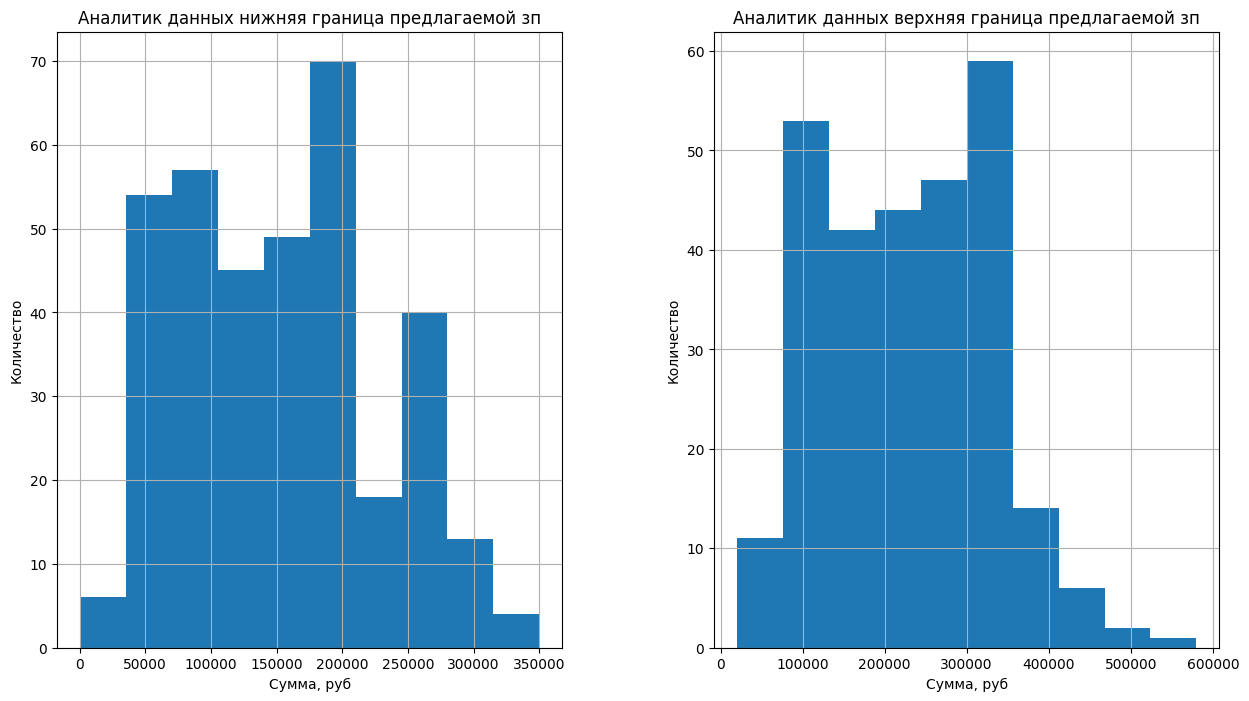

In [ ]:
#построим гистаграммы для числовых данных
px=da.hist(
    column=[
        'salary_from',
        'salary_to'
    ],
    figsize=(15, 8)
)

px[0][0].set_title('Аналитик данных нижняя граница предлагаемой зп')
px[0][0].set_xlabel('Сумма, руб')
px[0][0].set_ylabel('Количество')

px[0][1].set_title('Аналитик данных верхняя граница предлагаемой зп')
px[0][1].set_xlabel('Сумма, руб')
px[0][1].set_ylabel('Количество')

In [ ]:
#посмотрим на данные о системных аналитиках
analyze_dataframe(sa)

head:
          id                                    name        published_at  \
0  100039284  Junior аналитик данных (исследователь) 2024-05-24 09:37:04   
1  100039480                         Аналитик данных 2024-05-24 09:39:00   
2  100042705         Аналитик данных (исследователь) 2024-05-24 10:01:25   
3  100046788                 Ведущий аналитик данных 2024-05-24 10:28:18   
4  100056244                         Аналитик данных 2024-05-24 11:27:40   

                     alternate_url      type           employer  \
0  https://hh.ru/vacancy/100039284  Открытая  DNS Головной офис   
1  https://hh.ru/vacancy/100039480  Открытая              Комус   
2  https://hh.ru/vacancy/100042705  Открытая  DNS Головной офис   
3  https://hh.ru/vacancy/100046788  Открытая           Х5 Group   
4  https://hh.ru/vacancy/100056244  Открытая             ЛУКОЙЛ   

                   department         area             experience  \
0                         NaN  Владивосток  Junior (no experince)

Text(0, 0.5, 'Количество')

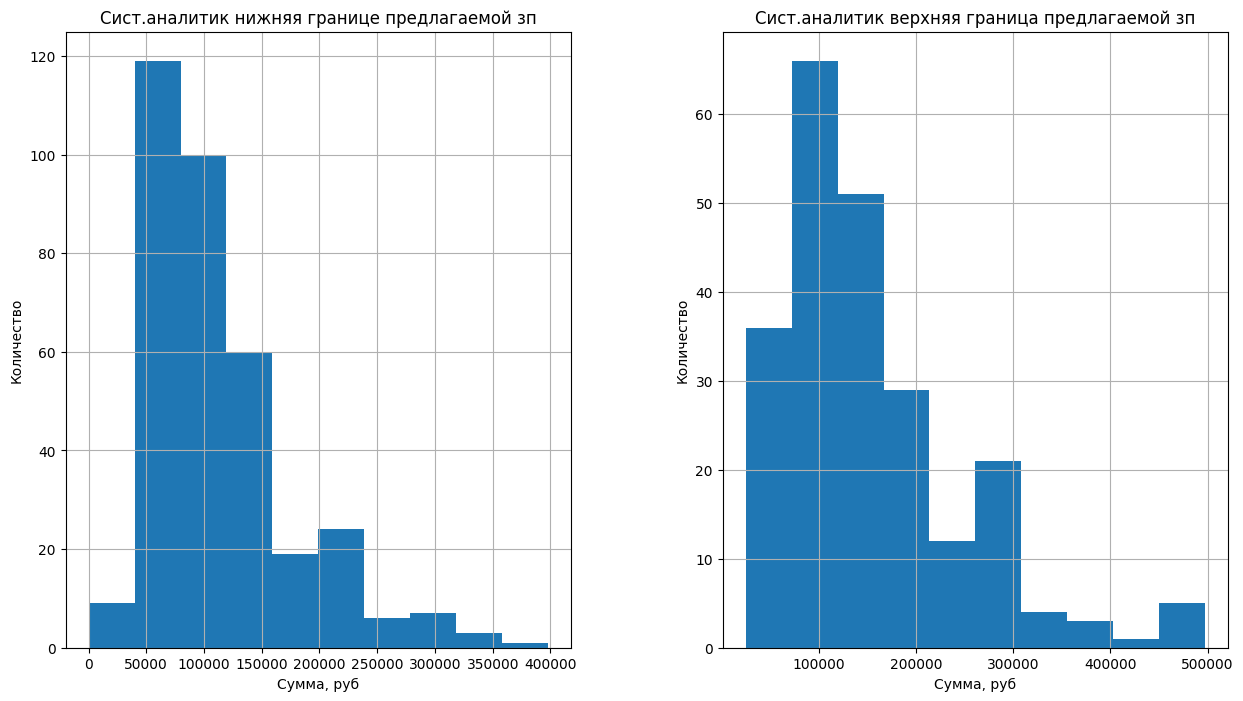

In [ ]:
#построим гистаграммы для числовых данных
px=sa.hist(
    column=[
        'salary_from',
        'salary_to'
    ],
    figsize=(15, 8)
)

px[0][0].set_title('Сист.аналитик нижняя границе предлагаемой зп')
px[0][0].set_xlabel('Сумма, руб')
px[0][0].set_ylabel('Количество')

px[0][1].set_title('Сист.аналитик верхняя граница предлагаемой зп')
px[0][1].set_xlabel('Сумма, руб')
px[0][1].set_ylabel('Количество')

In [ ]:
#посмотрим на данные о фед.округах
analyze_dataframe(district)

head:
              area         district
0           Москва           Москва
1  Санкт-Петербург  Санкт-Петербург
2     Екатеринбург        Уральский
3      Новосибирск        Сибирский
4           Казань      Приволжский
info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   area      106 non-null    object
 1   district  106 non-null    object
dtypes: object(2)
memory usage: 1.8+ KB
None
shape:
(106, 2)
Количество дубликатов в таблице:
0


In [ ]:
#посмотрим за какой период представлены данные Системные аналитики
display(sa['published_at'].min())
sa['published_at'].max()

Timestamp('2024-02-13 21:45:51')

Timestamp('2024-06-11 15:07:30')

In [ ]:
#посмотрим за какой период представлены данные Аналитики данных
display(da['published_at'].min())
da['published_at'].max()

Timestamp('2024-06-27 06:08:10')

Timestamp('2024-07-09 12:47:11')

### 1.1. Промежуточный вывод

В нашем распоряжении 1801 строк данных о вакансиях на аналитика данных за период с 13.02.24 по 11.06.24 и 1915 строк - на системных аналитиков - за период 13.02.24 по 11.06.24. Этих данных достаточно для анализа. Видим, что имеются пропуски по некоторым видам данных. Выбросов, дубликатов и некорректных типы данных нет.
Добавлена таблица с сопоставлением городов с фед.округами России.

## 2. ПРЕДОБРАБОТКА ДАННЫХ

### 2.1. Название вакансии

Проверим наименования вакансий на предмет актуальности

In [ ]:
#аналитики данных
da['name'].unique()

array(['Системный аналитик', 'Бизнес/Системный Аналитик',
       'Системный IT аналитик', 'Системный Аналитик ERP-решений',
       'Системный аналитик ЦФТ-Банк', 'Системный аналитик 1С ERP',
       'Системный аналитик АБС в Банк',
       'Системный аналитик / горный инженер (геолог/технолог/планировщик)',
       'Системный аналитик на внедрение TMS-системы 1С',
       'Системный аналитик (aCRM)', 'Системный аналитик R&D',
       'Системный аналитик (Складской учет)', 'Системный Аналитик (УВД)',
       'Системный аналитик (Solution Architect)',
       'Системный аналитик отдела разработки прикладных решений',
       'Системный аналитик / system analyst', 'Системный аналитик WMS',
       'Ведущий системный аналитик, Поставки продавца',
       'Системный аналитик (CRM-система)',
       'Системный аналитик (СберБанк Онлайн)',
       'Старший системный аналитик',
       'Аналитик данных \\ Системный аналитик',
       'Системный аналитик \\ Аналитик данных',
       'Ведущий системный аналити

In [ ]:
#системные аналитики
sa['name'].unique()

array(['Junior аналитик данных (исследователь)', 'Аналитик данных',
       'Аналитик данных (исследователь)', 'Ведущий аналитик данных',
       'Senior Data Analyst (Цифровой билайн)', 'Дата аналитик',
       'Data Analyst', 'Data Analyst / Data Scientist',
       'Продуктовый аналитик / Data Analyst',
       'Data analyst / Аналитик данных',
       'Аналитик данных (Отдел по анализу конкурентов)',
       'Аналитик данных (в офисе)', 'Data analyst',
       'Аналитик данных в клиентский сервис',
       'Аналитик данных (антифрод)', 'Аналитик данных (Data Analyst)',
       'Старший аналитик данных (клиентский опыт)',
       'Senior Data Analyst (Ads Platform)', 'Аналитик данных в Банк',
       'Аналитик данных CV (Северсталь Диджитал)',
       'Старший Аналитик данных в Яндекс Маркет',
       'Аналитик данных (Python)',
       'Data Analyst (Команда Управления Комплаенс)',
       'Senior Data Analyst', 'Аналитик данных (Data-analyst)',
       'Data Analyst / Аналитик данных (Middle)', 'А

**V** Наименования вакансий в каждой таблице актуальные, соответствуют Аналитикам данных и Системным аналитикам.

### 2.2. Объединение таблиц

Для удобства работы нам нужно объединить таблицы в одну. Чтобы не перепутать данные, добавим новый столбец в каждую таблицу (чтобы точно понимать данные на какую вакансию представлены - системный аналитик или аналитик данных).

In [ ]:
#добавим в каждую таблицу по новому столбцу с вакансией
da['vacancies'] = 'Аналитик данных'
sa['vacancies'] = 'Системный аналитик'

In [ ]:
#объединим данные в новую переменную
data = pd.concat([da, sa], ignore_index=True)

In [ ]:
#проверим
analyze_dataframe(data)

head:
          id                            name        published_at  \
0  100046399              Системный аналитик 2024-07-08 10:22:57   
1  100050107       Бизнес/Системный Аналитик 2024-07-06 17:19:32   
2  100059559           Системный IT аналитик 2024-07-08 11:48:17   
3  100063260  Системный Аналитик ERP-решений 2024-07-09 10:51:54   
4  100064793              Системный аналитик 2024-07-08 16:39:40   

                     alternate_url      type           employer department  \
0  https://hh.ru/vacancy/100046399  Открытая              Юрент        NaN   
1  https://hh.ru/vacancy/100050107  Открытая               Surf        NaN   
2  https://hh.ru/vacancy/100059559  Открытая           AMarkets        NaN   
3  https://hh.ru/vacancy/100063260  Открытая              Астор        NaN   
4  https://hh.ru/vacancy/100064793  Открытая  Зетта Страхование        NaN   

              area           experience  \
0           Москва   Middle (3-6 years)   
1  Санкт-Петербург  Junior+ (1

**V** Видим, что данные не потерялись, 3716 строк. Новый столбец добавлен, итого 21 столбец

### 2.3. Пропуски

А теперь посмотрим на пропуски:

In [ ]:
data.isna().sum()

,0
id,0
name,0
published_at,0
alternate_url,0
type,0
employer,0
department,2834
area,0
experience,0
key_skills,0


In [ ]:
#функция для нагладного представления пропусков
def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (17,5), legend = False)

        );
        plt.title('Пропущенные значения, %' + "\n", fontsize=22)
        plt.xlabel('Процент пропусков', fontsize=18)
        plt.ylabel('Столбцы с пропусками',fontsize=18)
        plt.xlim(0, 100)
    except:
        print('пропусков нет или произошла ошибка ')

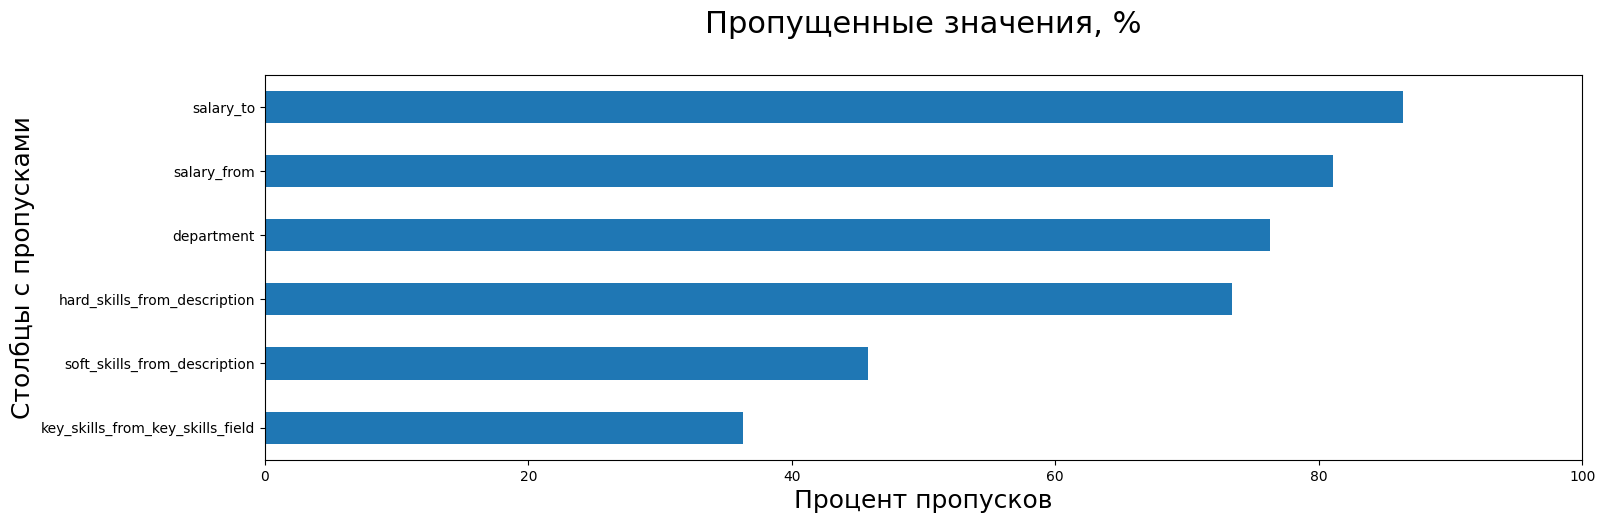

In [ ]:
#посмотрим на график пропусков
pass_value_barh(data)

**V** Видим, что отсутствует более 80% данных о нижней и верхней границе зп, почти 80% об отделе работодателя и "твердых" навыках, около 50% "мягких" навыков и почти 40% ключей к навыкам.

 * department - Работодатель, отдел - заполнить невозможно, данные для анализа некритичны, оставляем
 * salary_from - Нижняя граница предлагаемой заработной платы - заполнить невозможно, заменим на 0
 * salary_to - Верхняя граница предлагаемой заработной платы - заполнить невозможно, заменим на 0
 * key_skills_from_key_skills_field - Ключевые навыки из поля вакансии key_skills - оставляем, сформируем новые поля с навыками самостоятельно
 * hard_skills_from_description - “Твердые” навыки, найденные при обработке полей с навыками. Поле генерируется после получения информации от api - оставляем, сформируем новые поля с навыками самостоятельно
 * soft_skills_from_description - “Мягкие” навыки, найденные при обработке полей с навыками. Поле генерируется после получения информации от api - оставляем, сформируем новые поля с навыками самостоятельно

In [ ]:
#заменим пропуски в количественных данных на 0
data['salary_from'] = data['salary_from'].fillna(0)
data['salary_to'] = data['salary_to'].fillna(0)

In [ ]:
#проверим
data.isna().sum()

,0
id,0
name,0
published_at,0
alternate_url,0
type,0
employer,0
department,2834
area,0
experience,0
key_skills,0


**V** Все возможные пропуски заполнили.

### 2.4. Изучение категориальных значений

#### 2.4.1. Статус вакансии

In [ ]:
#посмотрим на уникальные значения
data['type'].value_counts()

,count
type,
Открытая,3716


**V** Все вакансии открытые.

#### 2.4.2. Работодатель

In [ ]:
#посмотрим на уникальные значения
data['employer'].value_counts()

,count
employer,
СБЕР,338
Т1,106
Aston,66
WILDBERRIES,51
Ozon,40
...,...
FIRECODE,1
Филиал в г. Санкт-Петербург АО Концерн Радиостроения Вега,1
Авиакомпания Победа,1


**V** Видим, большое количество уникальных работодателей и несколько работодателей с большим количеством вакансий.

#### 2.4.3. Регион места работы

In [ ]:
#посмотрим на уникальные значения
data['area'].value_counts()

,count
area,
Москва,2381
Санкт-Петербург,404
Екатеринбург,111
Новосибирск,82
Казань,80
...,...
Великие Луки,1
Пушкино (Московская область),1
Дмитров,1


In [ ]:
data['area'].unique()

array(['Москва', 'Санкт-Петербург', 'Апатиты', 'Екатеринбург', 'Курск',
       'Новосибирск', 'Пермь', 'Ростов-на-Дону', 'Краснодар', 'Ижевск',
       'Геленджик', 'Казань', 'Воронеж', 'Калининград', 'Владивосток',
       'Челябинск', 'Нижний Новгород', 'Белгород', 'Рубцовск',
       'Кольчугино', 'Томск', 'Омск', 'Смоленск', 'Калуга', 'Тверь',
       'Тюмень', 'Кострома', 'Тольятти', 'Майкоп', 'Сочи', 'Оренбург',
       'Саратов', 'Кемерово', 'Пенза', 'Уфа', 'Самара', 'Липецк',
       'Ставрополь', 'Хасавюрт', 'Иваново (Ивановская область)',
       'Вологда', 'Йошкар-Ола', 'Рязань', 'Владимир', 'Тамбов', 'Орел',
       'Тула', 'Красноярск', 'Киров (Кировская область)', 'Ульяновск',
       'Красногорск', 'Сургут', 'Белорецк', 'Ярославль', 'Брянск',
       'Чебоксары', 'Волгоград', 'Адлер', 'Саранск', 'Набережные Челны',
       'Севастополь', 'Мытищи', 'Дзержинск (Нижегородская область)',
       'Иннополис', 'Хабаровск', 'Таганрог', 'Иркутск', 'Улан-Удэ',
       'Петрозаводск', 'Магнито

**V** Видим, что вакансии из 106 населенных пунктов. Самое большое количество вакансий из городов-миллионников. Дублей нет.

Добавим столбец с данными о федеральных округах, Москву и СПб оставим как есть, рассмотрим их отдельно.

In [ ]:
#объединим с таблицей с фед.округами по названию города
data = pd.merge(data, district[['area', 'district']], on='area', how='left')

In [ ]:
#проверим
data.head()

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,vacancies,district
0,100046399,Системный аналитик,2024-07-08 10:22:57,https://hh.ru/vacancy/100046399,Открытая,Юрент,NaN,Москва,Middle (3-6 years),"['1С', 'Аналитический склад ума', 'confluence'...",...,юрент — это новый уровень городской мобильност...,юрент новый уровень городской мобильность круп...,0.0,0.0,ЗП не указана,"SQL, Аналитический склад ума, 1С",confluence,NaN,Аналитик данных,Москва
1,100050107,Бизнес/Системный Аналитик,2024-07-06 17:19:32,https://hh.ru/vacancy/100050107,Открытая,Surf,NaN,Санкт-Петербург,Junior+ (1-3 years),"['Разработка технических заданий', 'Бизнес-ана...",...,в surf уже 13 лет мы разрабатываем много разны...,surf 13 год разрабатывать разный продукт начин...,0.0,0.0,ЗП не указана,"BPMN, UML, Английский язык, Системный анализ, ...",NaN,Документация,Аналитик данных,Санкт-Петербург
2,100059559,Системный IT аналитик,2024-07-08 11:48:17,https://hh.ru/vacancy/100059559,Открытая,AMarkets,NaN,Москва,Junior+ (1-3 years),['Документация'],...,"мы - международная fintech компания amarkets, ...",международный fintech компания amarkets 2 7 го...,233750.0,0.0,ЗП не указана,NaN,NaN,Документация,Аналитик данных,Москва
3,100063260,Системный Аналитик ERP-решений,2024-07-09 10:51:54,https://hh.ru/vacancy/100063260,Открытая,Астор,NaN,Москва,Senior (6+ years),"['ERP', 'Atlassian Jira', '1С: Управление Прои...",...,компания «астор» с 2000 года занимается разраб...,компания астор 2 год заниматься разработка вне...,0.0,0.0,ЗП не указана,"ERP, 1С: Управление Торговлей, Atlassian Jira,...",confluence,Коммуникация,Аналитик данных,Москва
4,100064793,Системный аналитик,2024-07-08 16:39:40,https://hh.ru/vacancy/100064793,Открытая,Зетта Страхование,NaN,Москва,Junior+ (1-3 years),"['JSON', 'SQL', 'XML', 'SOAP', 'HTML', 'JS', '...",...,обязанности: анализ задач развития и сопрово...,обязанность анализ задача развитие сопровожден...,0.0,0.0,ЗП не указана,"SQL, C#, Java, JS, SOAP, JSON, XML, HTML, CSS",NaN,NaN,Аналитик данных,Москва


**V** Добавили новый столбец с фед.округами и городами фед.значения.

#### 2.4.4. Требуемый опыт работы

In [ ]:
#посмотрим на уникальные значения
data['experience'].value_counts()

,count
experience,
Junior+ (1-3 years),1943
Middle (3-6 years),1488
Junior (no experince),228
Senior (6+ years),57


**V** Видим, что требуемый опыт разделен на 4 категории, и вакансий на Senior (6+ years) очень мало для анализа, но т.к у нас имеется достаточно большое количество пропусков по другим данным, будем дорожить каждой строчкой и не удалим. Будем иметь в виду, что Senior (6+ years) малочисленно для анализа.

#### 2.4.5. Ключевые навыки

In [ ]:
#посмотрим на уникальные значения
data['key_skills'].value_counts()

,count
key_skills,
[],512
['Документация'],255
"['confluence', 'Документация']",115
['Pandas'],84
['confluence'],62
...,...
"['Складская логистика', 'Оптимизация логистических процессов', 'Atlassian Jira', 'SQL', 'Документация', 'UML', 'EPC', 'BPMN', 'Системный анализ', 'Atlassian Confluence']",1
"['Постановка задач разработчикам', 'Linux', 'Документация', 'Apache', 'MySQL', 'Nginx', 'PHP', 'Аналитическое мышление']",1
"['Atlassian Jira', 'SQL', 'XML', 'Юнит-экономика', 'Документация', 'confluence', 'BPMN', 'CRM', 'Аналитическое мышление']",1


Видим, что второй столбец, который основан на данных из key_skills

In [ ]:
#посмотрим на уникальные значения
data['key_skills_from_key_skills_field'].value_counts()

,count
key_skills_from_key_skills_field,
"SQL, Python",35
"UML, BPMN, SQL, REST, SOAP, RabbitMQ, Kafka",16
SQL,15
"Python, SQL",13
"Python, SQL, A/B тесты",10
...,...
"Python, Power BI, Pandas, Numpy, VBA, SQL, ETL",1
"Аудит, риски, Анализ данных, Ведение отчетности, Аналитика, MS Excel, SQL, Python",1
"Системный анализ, UML",1


Посмотрим на "твердые" навыки

In [ ]:
#посмотрим на уникальные значения
data['hard_skills_from_description'].value_counts()

,count
hard_skills_from_description,
confluence,636
Pandas,266
Юнит-экономика,39
"Pandas, confluence",30
"confluence, Юнит-экономика",9
"Pandas, Юнит-экономика",4
Google Sheets,2
"Pandas, Google Sheets",1
Математическая статистика,1


Посмотрим на "мягкие" навыки

In [ ]:
#посмотрим на уникальные значения
data['soft_skills_from_description'].value_counts()

,count
soft_skills_from_description,
Документация,1168
"Коммуникация, Документация",213
Коммуникация,175
Аналитическое мышление,148
"Документация, Аналитическое мышление",89
Проактивность,33
"Документация, Проактивность",29
"Документация, Переговоры",22
"Проактивность, Аналитическое мышление",15


**V**
Видим, что сгенерированные данные после api по "твердым" и "мягким" навыки не полные. Сделаем это самостоятельно. Выделим самые часто встречаемые навыки.

In [ ]:
#сохраним все навыки в отдельную переменную, каждый список, разделив по запятой и выведя каждый навык из нее в отдельную строку
key_skills_table = data['key_skills'].str.split(', ')
key_skills_table = key_skills_table.explode('key_skills')
key_skills_table = key_skills_table.str.replace(r'[\[\]\'\"]', '', regex=True).str.strip()
key_skills_table = key_skills_table[key_skills_table.str.strip() != ''] #убрали пустые значения

In [ ]:
#проверим
key_skills_table.head()

,key_skills
0,1С
1,Аналитический склад ума
2,confluence
3,SQL
4,Разработка технических заданий


In [ ]:
#посмотрим сколько всего получилось строк с навыками
key_skills_table.shape

(20056,)

In [ ]:
#посчитаем уникальные значения
key_skills_table.value_counts().head(30)

,count
key_skills,
Документация,1571
SQL,1438
confluence,675
Аналитическое мышление,658
BPMN,656
Python,629
Системный анализ,576
UML,574
Анализ данных,487


**V** Видим, что чаще всего требуются "твердые" навыки. Разделить навыки на "мягкие" и "твердые" автоматически не представляется возможным, сделаем это вручную при формировании выводов.

#### 2.4.6. График работы

In [ ]:
#посмотрим на уникальные значения
data['schedule'].value_counts()

,count
schedule,
Полный день,2644
Удаленная работа,960
Гибкий график,102
Сменный график,10


Видим, что Сменный график очень немногочислен, заменим его на Гибкий график.

In [ ]:
#замена
data['schedule'] = data['schedule'].replace('Сменный график', 'Гибкий график')

In [ ]:
#проверим
data['schedule'].value_counts()

,count
schedule,
Полный день,2644
Удаленная работа,960
Гибкий график,112


**V** Видим, что график состоит из 4 видов, и что самый популярный это Полный день, Гибкий график самый редкий вариант.

#### 2.4.7. Тип занятости

In [ ]:
#посмотрим на уникальные значения
data['employment'].value_counts()

,count
employment,
Полная занятость,3641
Стажировка,45
Частичная занятость,22
Проектная работа,8


Видим, что типов занятости 4, подавляющее большинство вакансий на Полную занятость. Остальные типа объединим в категорию Другие, чтобы было удобнее анализировать.

In [ ]:
#введем новый столбец
data['employment_new'] = data['employment'].replace({
    'Полная занятость': 'Полная занятость',
    'Стажировка': 'Другая занятость',
    'Частичная занятость': 'Другая занятость',
    'Проектная работа': 'Другая занятость'
})

In [ ]:
#проверим
data['employment_new'].value_counts()

,count
employment_new,
Полная занятость,3641
Другая занятость,75


**V** Подавляющее большинство вакансий предлагают Полную занятость. Объединили малочисленные типа занятости (Стажировка, Частичная занятость и Проектная работа) в Другую занятость, разместили в новом столбце employment_new

#### 2.4.8. Категория зп

In [ ]:
#посмотрим на уникальные значения
data['salary_bin'].value_counts()

,count
salary_bin,
ЗП не указана,3209
От 100 тысяч до 200 тысяч,171
От 200 тысяч до 300 тысяч,117
Больше 300 тысяч,110
Меньше 100 тысяч,109


Посмотрим на то от какого из столбцов данных зависит категория. Посмотрим на одну из категорий поближе.

In [ ]:
data.query('salary_bin == "От 100 тысяч до 200 тысяч"').head()

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,vacancies,district,employment_new
23,100450972,Системный аналитик,2024-07-09 08:14:09,https://hh.ru/vacancy/100450972,Открытая,МКК СМСФИНАНС,NaN,Новосибирск,Junior+ (1-3 years),"['Разработка технических заданий', 'Atlassian ...",...,добрый день смсфинанс финтех компания разрабат...,120000.0,180000.0,От 100 тысяч до 200 тысяч,"BPMN, UML, Atlassian Jira, Atlassian Confluenc...",confluence,Документация,Аналитик данных,Сибирский,Полная занятость
101,101181741,Системный аналитик / Консультант 1С (2 линия),2024-07-07 21:49:24,https://hh.ru/vacancy/101181741,Открытая,"АвтоГЕРМЕС, Группа компаний",NaN,Москва,Junior+ (1-3 years),"['Документация', 'Аналитическое мышление']",...,группа компания автогермес официальный дилер а...,80000.0,115000.0,От 100 тысяч до 200 тысяч,NaN,NaN,"Документация, Аналитическое мышление",Аналитик данных,Москва,Полная занятость
107,101232203,Системный аналитик,2024-06-28 14:33:49,https://hh.ru/vacancy/101232203,Открытая,"ЭФКО, Управляющая компания",Информационные технологии,Белгород,Junior+ (1-3 years),[],...,ваш задача сбор анализ оценка требование польз...,80000.0,128000.0,От 100 тысяч до 200 тысяч,NaN,NaN,NaN,Аналитик данных,Центральный,Полная занятость
232,101642653,Системный аналитик,2024-07-07 14:20:03,https://hh.ru/vacancy/101642653,Открытая,"ИСКАНДЕР, ГК",NaN,Санкт-Петербург,Middle (3-6 years),"['IDEF', 'Atlassian Jira', 'Анализ данных', 'B...",...,задача предстоять решать анализ бизнес процесс...,0.0,140000.0,От 100 тысяч до 200 тысяч,"Figma, Mockup, Balsamiq, IDEF, Redmine, Atlass...",confluence,Документация,Аналитик данных,Санкт-Петербург,Полная занятость
233,101642654,Системный аналитик,2024-07-07 14:20:03,https://hh.ru/vacancy/101642654,Открытая,"ИСКАНДЕР, ГК",NaN,Казань,Middle (3-6 years),"['IDEF', 'Atlassian Jira', 'Анализ данных', 'B...",...,задача предстоять решать анализ бизнес процесс...,0.0,140000.0,От 100 тысяч до 200 тысяч,"Figma, Mockup, Balsamiq, IDEF, Redmine, Atlass...",confluence,Документация,Аналитик данных,Приволжский,Полная занятость


Видим, что категория зп устанавливается в зависимости от верхней границы зп (salary_to). В этих данным много пропусков. Проверим категорию "ЗП не указана" на наличие нижней границы зп (salary_from).

In [ ]:
data.query('salary_bin == "ЗП не указана" and salary_from > 0').head()

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,vacancies,district,employment_new
2,100059559,Системный IT аналитик,2024-07-08 11:48:17,https://hh.ru/vacancy/100059559,Открытая,AMarkets,NaN,Москва,Junior+ (1-3 years),['Документация'],...,международный fintech компания amarkets 2 7 го...,233750.0,0.0,ЗП не указана,NaN,NaN,Документация,Аналитик данных,Москва,Полная занятость
8,100119249,Системный аналитик АБС в Банк,2024-07-08 10:26:20,https://hh.ru/vacancy/100119249,Открытая,Сателл ИТ,NaN,Москва,Junior+ (1-3 years),['Документация'],...,управление развитие сопровождение приложение о...,220000.0,0.0,ЗП не указана,NaN,NaN,Документация,Аналитик данных,Москва,Полная занятость
31,100581829,Аналитик данных \ Системный аналитик,2024-06-27 12:04:15,https://hh.ru/vacancy/100581829,Открытая,Сеть Партнерств,NaN,Москва,Middle (3-6 years),"['SQL', 'Python', 'Документация', 'DWH', 'conf...",...,аккредитовать продуктовый it компания создател...,250000.0,0.0,ЗП не указана,"SQL, Python, PostgreSQL, API, ETL, DWH, Базы д...",confluence,Документация,Аналитик данных,Москва,Полная занятость
32,100581830,Системный аналитик \ Аналитик данных,2024-06-27 12:12:35,https://hh.ru/vacancy/100581830,Открытая,Сеть Партнерств,NaN,Краснодар,Middle (3-6 years),"['confluence', 'Документация']",...,аккредитовать продуктовый it компания создател...,250000.0,0.0,ЗП не указана,NaN,confluence,Документация,Аналитик данных,Южный,Полная занятость
33,100581831,Системный аналитик \ Аналитик данных,2024-07-05 09:28:01,https://hh.ru/vacancy/100581831,Открытая,Сеть Партнерств,NaN,Санкт-Петербург,Middle (3-6 years),"['confluence', 'Документация']",...,аккредитовать продуктовый it компания создател...,250000.0,0.0,ЗП не указана,NaN,confluence,Документация,Аналитик данных,Санкт-Петербург,Полная занятость


Видим, что подозрение подтвердилось: категория "ЗП не указана" может быть и при наличии нижней границы зп (salary_from). Добавим столбец, где поменяем категории у строк с нижней границей зп и без верхней границы на ту, которая соответствует нижней границе.

In [ ]:
# функция для категоризации зарплат
def categorize_salary(row):
    salary = row['salary_to'] if row['salary_to'] != 0 else row['salary_from']

    if salary == 0:
        return 'ЗП не указана'
    elif 100000 <= salary < 200000:
        return 'От 100 тысяч до 200 тысяч'
    elif 200000 <= salary < 300000:
        return 'От 200 тысяч до 300 тысяч'
    elif salary >= 300000:
        return 'Больше 300 тысяч'
    else:
        return 'Меньше 100 тысяч'

# создание нового столбца на основе функции
data['salary_bin_corr'] = data.apply(categorize_salary, axis=1)

In [ ]:
#проверим
data.query('salary_bin_corr == "ЗП не указана" and salary_from > 0').head()

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,vacancies,district,employment_new,salary_bin_corr


In [ ]:
data['salary_bin_corr'].value_counts()

,count
salary_bin_corr,
ЗП не указана,2858
От 100 тысяч до 200 тысяч,309
Меньше 100 тысяч,243
От 200 тысяч до 300 тысяч,183
Больше 300 тысяч,123


In [ ]:
#для контроля рассчитаем сколько строк без указания обоих границ зп
data.query('salary_to <= 0 and salary_from<=0').shape

(2858, 24)

**V** Добавили новый столбец salary_bin_corr с категориями зп, учитывающими нижнюю границу зп при отсутствии верхней. Теперь все верно: пропущено 2858 данных о зп, это категория "ЗП не указана".

### 2.5. Изучение количественных значений

#### 2.5.1. Нижняя граница предлагаемой заработной платы

Построим гистаграмму размаха для поиска выбросов

<Axes: >

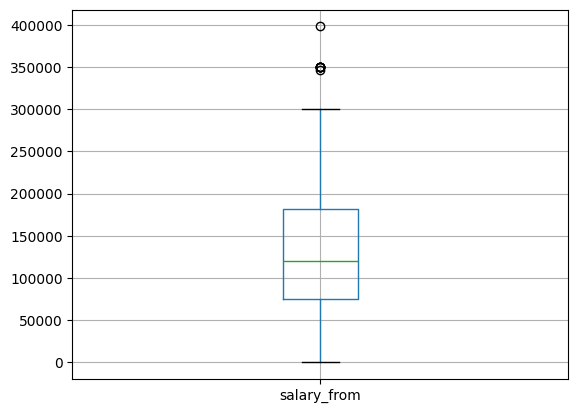

In [ ]:
data.query('salary_from>0').boxplot('salary_from')

In [ ]:
#посмотрим поближе на зп более 300 тыс
data.query('salary_from > 300000')

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,vacancies,district,employment_new,salary_bin_corr
735,103043223,Системный аналитик,2024-07-01 12:44:46,https://hh.ru/vacancy/103043223,Открытая,Demis Group,NaN,Москва,Middle (3-6 years),"['SQL', 'Анализ данных', 'Документация', 'conf...",...,350000.0,0.0,ЗП не указана,"SQL, Анализ данных, Базы данных",confluence,Документация,Аналитик данных,Москва,Полная занятость,Больше 300 тысяч
803,103084243,Системный аналитик (в продуктовую ИТ-компанию),2024-07-01 22:13:15,https://hh.ru/vacancy/103084243,Открытая,Vital Partners,NaN,Санкт-Петербург,Senior (6+ years),"['REST', 'SQL', 'Анализ данных', 'SOAP', 'UML'...",...,350000.0,420000.0,Больше 300 тысяч,"REST, SQL, UML, Анализ данных, Camunda, Kafka,...",NaN,NaN,Аналитик данных,Санкт-Петербург,Полная занятость,Больше 300 тысяч
960,103227680,Системный аналитик (ДБО),2024-07-03 15:23:12,https://hh.ru/vacancy/103227680,Открытая,АйТиКвик,NaN,Санкт-Петербург,Senior (6+ years),"['Scrum', 'REST', 'Atlassian Jira', 'SQL', 'XM...",...,350000.0,450000.0,Больше 300 тысяч,"Системный анализ, SQL, REST, API, Atlassian Ji...",confluence,Документация,Аналитик данных,Санкт-Петербург,Полная занятость,Больше 300 тысяч
1282,103536939,Системный аналитик (ИТ-продуктовая компания),2024-07-08 20:17:21,https://hh.ru/vacancy/103536939,Открытая,Vital Partners,NaN,Москва,Junior+ (1-3 years),"['REST', 'SQL', 'Анализ данных', 'UML', 'Postg...",...,350000.0,400000.0,Больше 300 тысяч,"REST, SQL, UML, PostgreSQL, Анализ данных",NaN,NaN,Аналитик данных,Москва,Полная занятость,Больше 300 тысяч
1926,100077910,Data Analyst / Data Scientist,2024-06-11 14:17:47,https://hh.ru/vacancy/100077910,Открытая,Итсен,NaN,Москва,Middle (3-6 years),"['Linux', 'SQL', 'Бизнес-анализ', 'Hadoop', 'B...",...,350000.0,0.0,ЗП не указана,"Python, SQL, Обучение и развитие, Data Mining,...",NaN,Аналитическое мышление,Системный аналитик,Москва,Полная занятость,Больше 300 тысяч
2471,94100628,Data Analyst (middle/senior),2024-05-12 12:51:55,https://hh.ru/vacancy/94100628,Открытая,Fundraise Up,NaN,Москва,Middle (3-6 years),"['Английский язык', 'SQL', 'A/B тесты', 'Data ...",...,345950.0,495550.0,Больше 300 тысяч,"SQL, Английский язык, PostgreSQL, A/B тесты, D...",Pandas,NaN,Системный аналитик,Москва,Полная занятость,Больше 300 тысяч
2597,94930142,Sr Data analyst / Аналитик разработчик,2024-03-18 10:39:48,https://hh.ru/vacancy/94930142,Открытая,АйТиКвик,NaN,Воронеж,Middle (3-6 years),"['SQL', 'Power BI', 'Документация', 'Data Anal...",...,350000.0,400000.0,Больше 300 тысяч,"Power BI, Big Data, SQL, Data Analysis, Базы д...",NaN,Документация,Системный аналитик,Центральный,Полная занятость,Больше 300 тысяч
3612,99555701,Data Analyst,2024-05-20 11:07:34,https://hh.ru/vacancy/99555701,Открытая,Mayflower,NaN,Москва,Middle (3-6 years),"['Английский язык', 'Коммуникация', 'SQL', 'A/...",...,398000.0,497500.0,Больше 300 тысяч,"Python, A/B тесты, Big Data, Data Analysis, Ta...",Юнит-экономика,"Коммуникация, Критическое мышление",Системный аналитик,Москва,Полная занятость,Больше 300 тысяч


Видим, что есть вакансия на Junior+ (1-3 years) с подозрительно высокой зп - удалим ее. Остальные оставим.

In [ ]:
data = data.drop(index=1282)

In [ ]:
#проверим после удаления
data.query('salary_from > 300000')

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,vacancies,district,employment_new,salary_bin_corr
735,103043223,Системный аналитик,2024-07-01 12:44:46,https://hh.ru/vacancy/103043223,Открытая,Demis Group,NaN,Москва,Middle (3-6 years),"['SQL', 'Анализ данных', 'Документация', 'conf...",...,350000.0,0.0,ЗП не указана,"SQL, Анализ данных, Базы данных",confluence,Документация,Аналитик данных,Москва,Полная занятость,Больше 300 тысяч
803,103084243,Системный аналитик (в продуктовую ИТ-компанию),2024-07-01 22:13:15,https://hh.ru/vacancy/103084243,Открытая,Vital Partners,NaN,Санкт-Петербург,Senior (6+ years),"['REST', 'SQL', 'Анализ данных', 'SOAP', 'UML'...",...,350000.0,420000.0,Больше 300 тысяч,"REST, SQL, UML, Анализ данных, Camunda, Kafka,...",NaN,NaN,Аналитик данных,Санкт-Петербург,Полная занятость,Больше 300 тысяч
960,103227680,Системный аналитик (ДБО),2024-07-03 15:23:12,https://hh.ru/vacancy/103227680,Открытая,АйТиКвик,NaN,Санкт-Петербург,Senior (6+ years),"['Scrum', 'REST', 'Atlassian Jira', 'SQL', 'XM...",...,350000.0,450000.0,Больше 300 тысяч,"Системный анализ, SQL, REST, API, Atlassian Ji...",confluence,Документация,Аналитик данных,Санкт-Петербург,Полная занятость,Больше 300 тысяч
1926,100077910,Data Analyst / Data Scientist,2024-06-11 14:17:47,https://hh.ru/vacancy/100077910,Открытая,Итсен,NaN,Москва,Middle (3-6 years),"['Linux', 'SQL', 'Бизнес-анализ', 'Hadoop', 'B...",...,350000.0,0.0,ЗП не указана,"Python, SQL, Обучение и развитие, Data Mining,...",NaN,Аналитическое мышление,Системный аналитик,Москва,Полная занятость,Больше 300 тысяч
2471,94100628,Data Analyst (middle/senior),2024-05-12 12:51:55,https://hh.ru/vacancy/94100628,Открытая,Fundraise Up,NaN,Москва,Middle (3-6 years),"['Английский язык', 'SQL', 'A/B тесты', 'Data ...",...,345950.0,495550.0,Больше 300 тысяч,"SQL, Английский язык, PostgreSQL, A/B тесты, D...",Pandas,NaN,Системный аналитик,Москва,Полная занятость,Больше 300 тысяч
2597,94930142,Sr Data analyst / Аналитик разработчик,2024-03-18 10:39:48,https://hh.ru/vacancy/94930142,Открытая,АйТиКвик,NaN,Воронеж,Middle (3-6 years),"['SQL', 'Power BI', 'Документация', 'Data Anal...",...,350000.0,400000.0,Больше 300 тысяч,"Power BI, Big Data, SQL, Data Analysis, Базы д...",NaN,Документация,Системный аналитик,Центральный,Полная занятость,Больше 300 тысяч
3612,99555701,Data Analyst,2024-05-20 11:07:34,https://hh.ru/vacancy/99555701,Открытая,Mayflower,NaN,Москва,Middle (3-6 years),"['Английский язык', 'Коммуникация', 'SQL', 'A/...",...,398000.0,497500.0,Больше 300 тысяч,"Python, A/B тесты, Big Data, Data Analysis, Ta...",Юнит-экономика,"Коммуникация, Критическое мышление",Системный аналитик,Москва,Полная занятость,Больше 300 тысяч


**V** Удалили выбросы

#### 2.5.2. Верхняя граница предлагаемой заработной платы

Построим гистаграмму размаха для поиска выбросов

<Axes: >

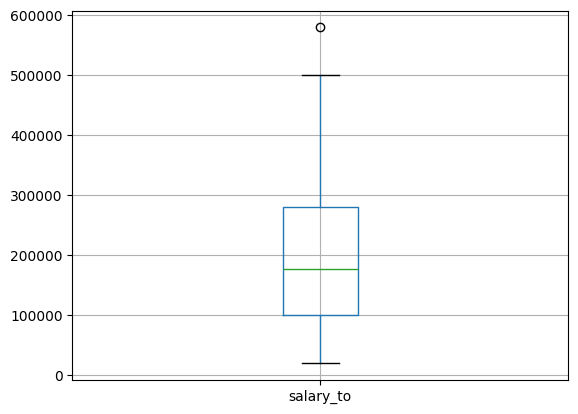

In [ ]:
data.query('salary_to>0').boxplot('salary_to')

In [ ]:
#посмотрим поближе на зп более 500 тыс
data.query('salary_to > 500000')

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,vacancies,district,employment_new,salary_bin_corr
1295,103552148,Системный аналитик Senior,2024-07-09 07:41:15,https://hh.ru/vacancy/103552148,Открытая,Offer Now,NaN,Москва,Junior+ (1-3 years),['Документация'],...,0.0,580000.0,Больше 300 тысяч,NaN,NaN,Документация,Аналитик данных,Москва,Полная занятость,Больше 300 тысяч


Видим, что есть вакансия на Junior+ (1-3 years) с подозрительно высокой зп - удалим ее.

In [ ]:
data = data.drop(index=1295)

In [ ]:
#проверим после удаления
data.query('salary_to > 500000')

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,vacancies,district,employment_new,salary_bin_corr


**V** Удалили выбросы

### 2.6. Промежуточный вывод

Проведена предобработка:
1. объединены таблицы в один датафрейм
2. проверено на пропуски. Отсутствует более 80% данных о нижней и верхней границе зп, почти 80% об отделе работодателя и "твердых" навыках, около 50% "мягких" навыков и почти 40% ключей к навыкам.
3. проверено на дубли - не были обнаружены
4. проверены категориальные данные - они корректные. Объединили малочисленные типа занятости (Стажировка, Частичная занятость и Проектная работа) в Другую занятость
5. проверены количественные данные - избавились от выбросов
6. добавлены новые столбцы:
 - salary_bin_corr - корректные категории зп
 - employment_new - тип занятости
 - vacancies - тип вакансий (Аналитик данных или Системный аналитик)
 - district - федеральные округа


## 3. ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ДАННЫХ

### 3.1. Грейды (требуемый опыт работы)

Посмотрим какой опыт работы чаще всего требуется в каждом из видов вакансий

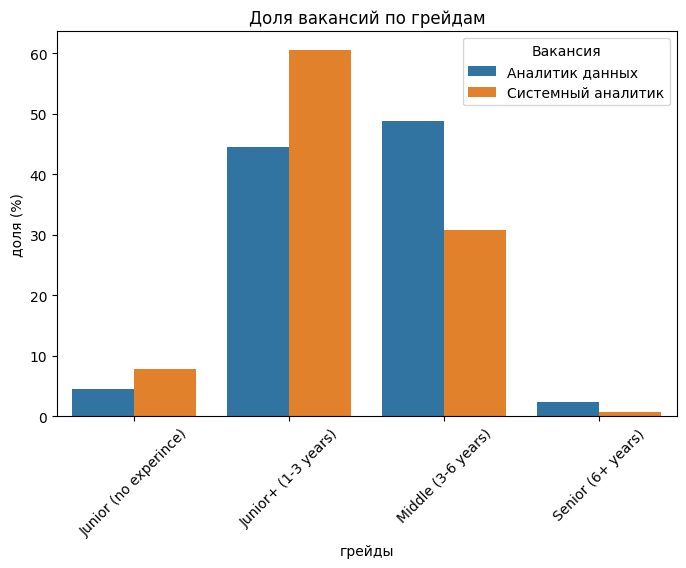

In [ ]:
# Подсчет количества опыта для каждой вакансии
experience_count = data.groupby(['vacancies', 'experience']).size().reset_index(name='count')

# Подсчет процента опыта для каждой вакансии
experience_count['percentage'] = experience_count.groupby('vacancies')['count'].transform(lambda x: x / x.sum() * 100)

# Построение графика
plt.figure(figsize=(8, 5))
sns.barplot(data=experience_count, x='experience', y='percentage', hue='vacancies')
plt.title('Доля вакансий по грейдам')
plt.xlabel('грейды')
plt.ylabel('доля (%)')
plt.legend(title='Вакансия')
plt.xticks(rotation=45)
plt.show()

**V** Вакансии на Аналитика данных требуют опыта работы Junior+ (1-3 years) в 45% случаев, и в 50% - Middle (3-6 years).
На Системного аналитика требуют опыта работы Junior+ (1-3 years) в 60% случаев и 30% Middle (3-6 years).
Без опыта работы и Senior (6+ years) требуется значительно меньше (менее 10% каждой категории) по обоим вакансиям.

### 3.2. Тип занятости

Посмотрим разницу в вакансиях по типу занятости

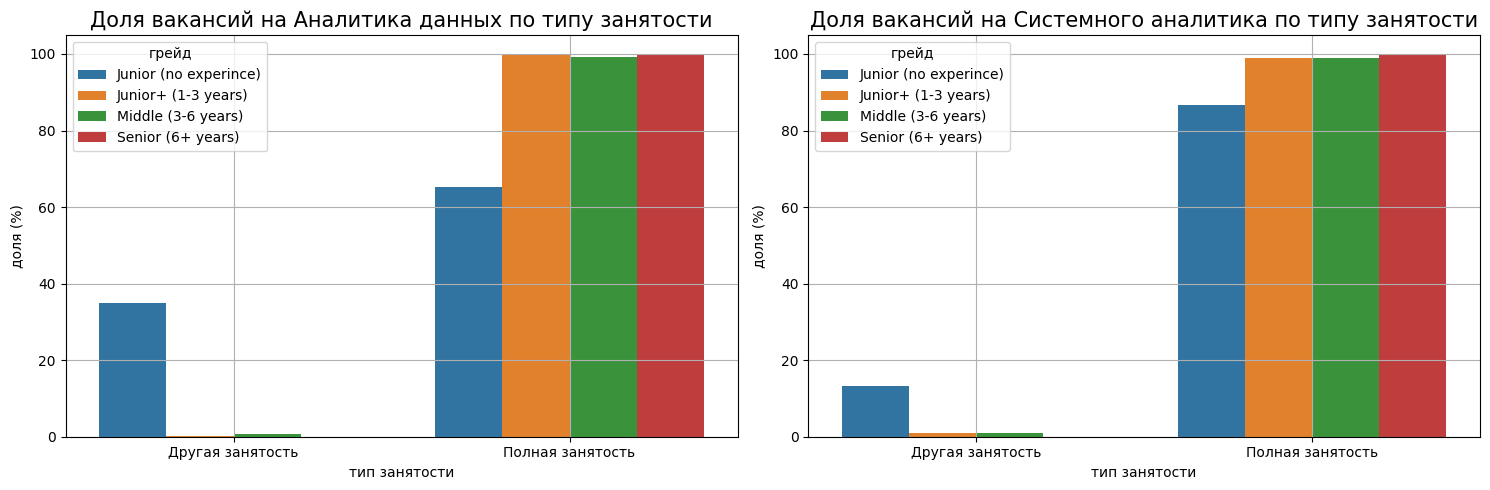

In [ ]:
# Параметры для графиков
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # Создаем 1 строку и 2 столбца

# Аналитик данных
experience_count = data.query('vacancies=="Аналитик данных"').groupby(['experience', 'employment_new']).size().reset_index(name='count')
experience_count['percentage'] = experience_count.groupby('experience')['count'].transform(lambda x: x / x.sum() * 100)

sns.barplot(data=experience_count, x='employment_new', y='percentage', hue='experience', ax=axes[0])
axes[0].set_title('Доля вакансий на Аналитика данных по типу занятости', fontsize=15)
axes[0].set_xlabel('тип занятости')
axes[0].set_ylabel('доля (%)')
axes[0].legend(title='грейд')
axes[0].tick_params(axis='x')
axes[0].grid(True)  # Добавляем сетку на график

# Системный аналитик
experience_count = data.query('vacancies=="Системный аналитик"').groupby(['experience', 'employment_new']).size().reset_index(name='count')
experience_count['percentage'] = experience_count.groupby('experience')['count'].transform(lambda x: x / x.sum() * 100)

sns.barplot(data=experience_count, x='employment_new', y='percentage', hue='experience', ax=axes[1])
axes[1].set_title('Доля вакансий на Системного аналитика по типу занятости', fontsize=15)
axes[1].set_xlabel('тип занятости')
axes[1].set_ylabel('доля (%)')
axes[1].legend(title='грейд')
axes[1].tick_params(axis='x')
axes[1].grid(True)  # Добавляем сетку на график

plt.tight_layout()  # Чтобы избежать наложения графиков
plt.show()

**V** На обе профессии по всем грейдам в подавляющем большинстве требуются на полную занятость. При этом другой тип занятости чаще предлагается для Junior (no experince) и чаще у Системных аналитиков.

### 3.3. График работы

Посмотрим на различия по графику работы

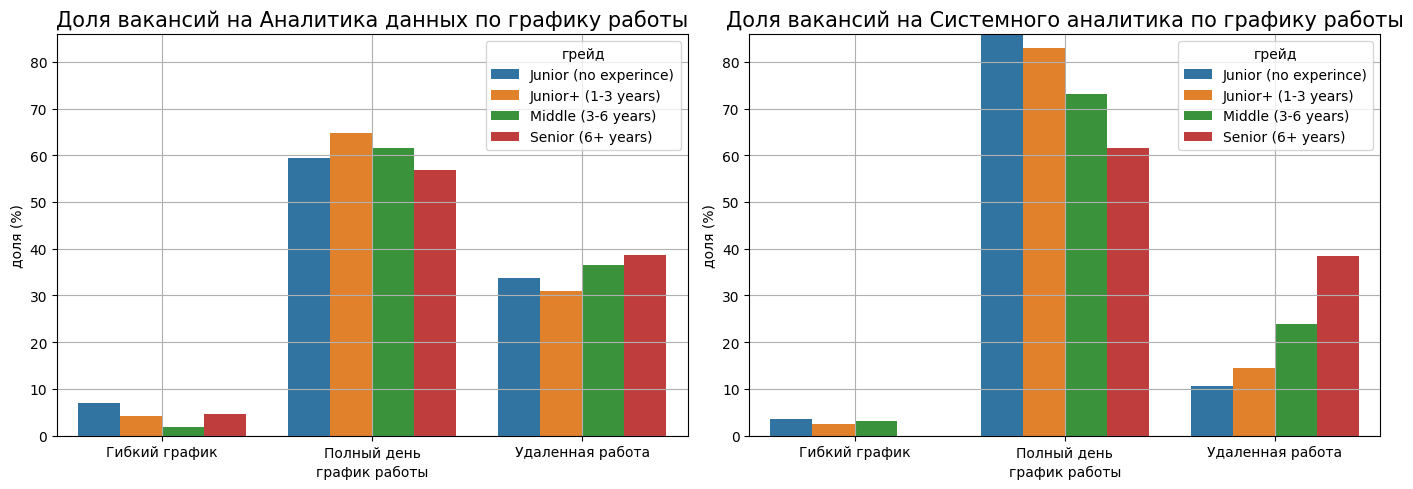

In [ ]:
# параметры для графиков
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharex=True)  # Создаем 1 строку и 2 столбца

# Аналитик данных
experience_count_data_analyst = data.query('vacancies=="Аналитик данных"').groupby(['experience', 'schedule']).size().reset_index(name='count')
experience_count_data_analyst['percentage'] = experience_count_data_analyst.groupby('experience')['count'].transform(lambda x: x / x.sum() * 100)

sns.barplot(data=experience_count_data_analyst, x='schedule', y='percentage', hue='experience', ax=axes[0])
axes[0].set_title('Доля вакансий на Аналитика данных по графику работы', fontsize=15)
axes[0].set_xlabel('график работы')
axes[0].set_ylabel('доля (%)')
axes[0].legend(title='грейд')
axes[0].tick_params(axis='x')
axes[0].grid(True)

# Системный аналитик
experience_count = data.query('vacancies=="Системный аналитик"').groupby(['experience', 'schedule']).size().reset_index(name='count')
experience_count['percentage'] = experience_count.groupby('experience')['count'].transform(lambda x: x / x.sum() * 100)

sns.barplot(data=experience_count, x='schedule', y='percentage', hue='experience', ax=axes[1])
axes[1].set_title('Доля вакансий на Системного аналитика по графику работы', fontsize=15)
axes[1].set_xlabel('график работы')
axes[1].set_ylabel('доля (%)')
axes[1].legend(title='грейд')
axes[1].tick_params(axis='x')
axes[1].grid(True)

# Установка одинаковых границ для оси Y
y_max = max(experience_count_data_analyst['percentage'].max(), experience_count['percentage'].max())
axes[0].set_ylim(0, y_max)
axes[1].set_ylim(0, y_max)

plt.tight_layout()
plt.show()

**V** Видим, что по обоим видам вакансий и всем грейдам чаще предлагают полный день. При этом Системным аналитикам удаленная работа предлагается чаще, чем Аналитикам данных- по всем грейдам у 30-40% вакансий. Аналитикам данных в начале пути менее 10% вакансий возможна удаленная работа.

### 3.4. Категория зарплаты

Посмотрим на различия в зарплате. Будем учитывать только те вакансии, у которых указана зп.  Помним, что в более 80% вакансий зп не указана

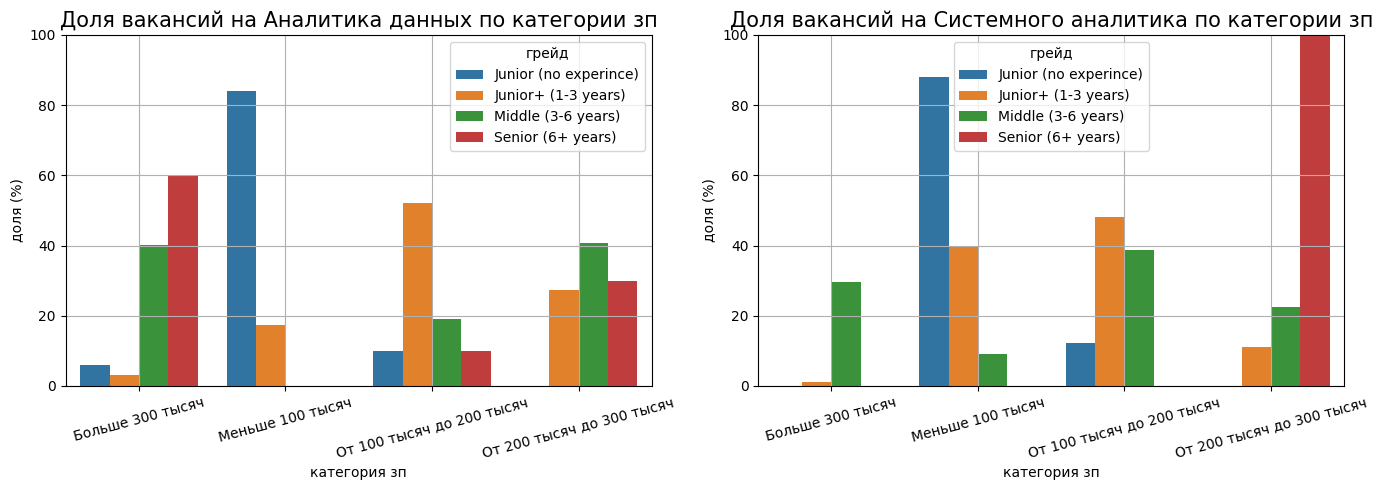

In [ ]:
# параметры для графиков
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharex=True)  # Создаем 1 строку и 2 столбца

# Аналитик данных
experience_count_data_analyst = data.query('vacancies=="Аналитик данных" and salary_bin_corr != "ЗП не указана"').groupby(['experience', 'salary_bin_corr']).size().reset_index(name='count')
experience_count_data_analyst['percentage'] = experience_count_data_analyst.groupby('experience')['count'].transform(lambda x: x / x.sum() * 100)

sns.barplot(data=experience_count_data_analyst, x='salary_bin_corr', y='percentage', hue='experience', ax=axes[0])
axes[0].set_title('Доля вакансий на Аналитика данных по категории зп', fontsize=15)
axes[0].set_xlabel('категория зп')
axes[0].set_ylabel('доля (%)')
axes[0].legend(title='грейд')
axes[0].tick_params(axis='x', rotation=15)
axes[0].grid(True)

# Системный аналитик
experience_count = data.query('vacancies=="Системный аналитик" and salary_bin_corr != "ЗП не указана"').groupby(['experience', 'salary_bin_corr']).size().reset_index(name='count')
experience_count['percentage'] = experience_count.groupby('experience')['count'].transform(lambda x: x / x.sum() * 100)

sns.barplot(data=experience_count, x='salary_bin_corr', y='percentage', hue='experience', ax=axes[1])
axes[1].set_title('Доля вакансий на Системного аналитика по категории зп', fontsize=15)
axes[1].set_xlabel('категория зп')
axes[1].set_ylabel('доля (%)')
axes[1].legend(title='грейд')
axes[1].tick_params(axis='x', rotation=15)
axes[1].grid(True)

# Установка одинаковых границ для оси Y
y_max = max(experience_count_data_analyst['percentage'].max(), experience_count['percentage'].max())
axes[0].set_ylim(0, y_max)
axes[1].set_ylim(0, y_max)

plt.tight_layout()
plt.show()

**V** Довольно логично распределены категории зп по грейдам по обоим видам вакансий. Чем меньше опыт, тем меньше зп. Отличие заключается в том, что 100% вакансий на Аналитика данных предлагает Senior категорию от 200 до 300 тыс, когда у Системных аналитиков, 60% вакансий предлагает выше 300 тыс.

### 3.5. Регион места работы

Посмотрим как влияют на вакансии регион работы (федеральный округ и города фед.значения)

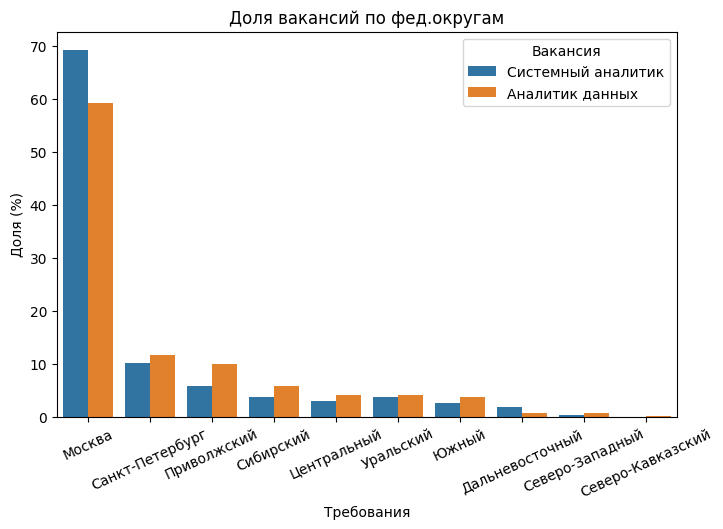

In [ ]:
# Подсчет количества опыта для каждой вакансии
experience_count = data.groupby(['vacancies', 'district']).size().reset_index(name='count')

# Подсчет процента опыта для каждой вакансии
experience_count['percentage'] = experience_count.groupby('vacancies')['count'].transform(lambda x: x / x.sum() * 100)

# Сортировка по проценту в порядке убывания
experience_count = experience_count.sort_values(by='percentage', ascending=False)

# Построение графика
plt.figure(figsize=(8, 5))
sns.barplot(data=experience_count, x='district', y='percentage', hue='vacancies')
plt.title('Доля вакансий по фед.округам')
plt.xlabel('Требования')
plt.ylabel('Доля (%)')
plt.legend(title='Вакансия')
plt.xticks(rotation=25)
plt.show()

**V** Видим, что 70% вакансий на Аналитика данных и 60% на Системного аналитика приходится на Москву. По 5-10% приходится на СПб и Приволжский округ, остальные округа предлагают по 5% и менее.

Посмотрим на грейды по фед.округам

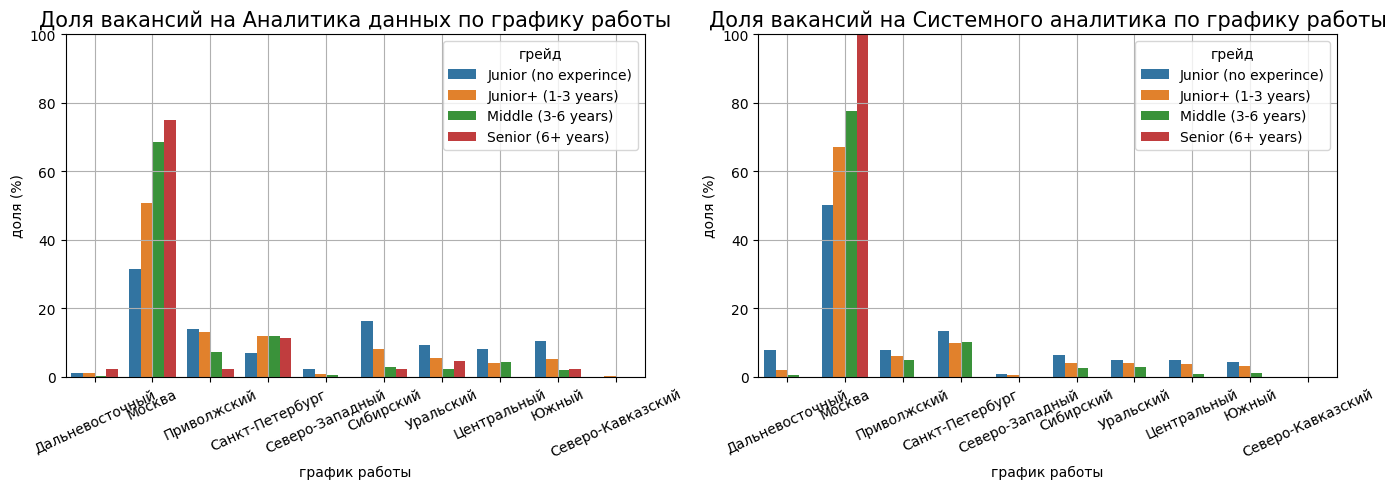

In [ ]:
# параметры для графиков
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharex=True)  # Создаем 1 строку и 2 столбца

# Аналитик данных
experience_count_data_analyst = data.query('vacancies=="Аналитик данных"').groupby(['experience', 'district']).size().reset_index(name='count')
experience_count_data_analyst['percentage'] = experience_count_data_analyst.groupby('experience')['count'].transform(lambda x: x / x.sum() * 100)

sns.barplot(data=experience_count_data_analyst, x='district', y='percentage', hue='experience', ax=axes[0])
axes[0].set_title('Доля вакансий на Аналитика данных по графику работы', fontsize=15)
axes[0].set_xlabel('график работы')
axes[0].set_ylabel('доля (%)')
axes[0].legend(title='грейд')
axes[0].tick_params(axis='x', rotation=25)
axes[0].grid(True)

# Системный аналитик
experience_count = data.query('vacancies=="Системный аналитик"').groupby(['experience', 'district']).size().reset_index(name='count')
experience_count['percentage'] = experience_count.groupby('experience')['count'].transform(lambda x: x / x.sum() * 100)

sns.barplot(data=experience_count, x='district', y='percentage', hue='experience', ax=axes[1])
axes[1].set_title('Доля вакансий на Системного аналитика по графику работы', fontsize=15)
axes[1].set_xlabel('график работы')
axes[1].set_ylabel('доля (%)')
axes[1].legend(title='грейд')
axes[1].tick_params(axis='x', rotation=25)
axes[1].grid(True)

# Установка одинаковых границ для оси Y
y_max = max(experience_count_data_analyst['percentage'].max(), experience_count['percentage'].max())
axes[0].set_ylim(0, y_max)
axes[1].set_ylim(0, y_max)

plt.tight_layout()
plt.show()

**V** Видим, что вакансии на Аналитика данных преобладают в Москве, 100% вакансий Senior и 80% Middle в Москве.
Вакансии на Системного аналитика чуть более распределены по стране, особенно Junior без опыта.

Посмотрим на зп по округам

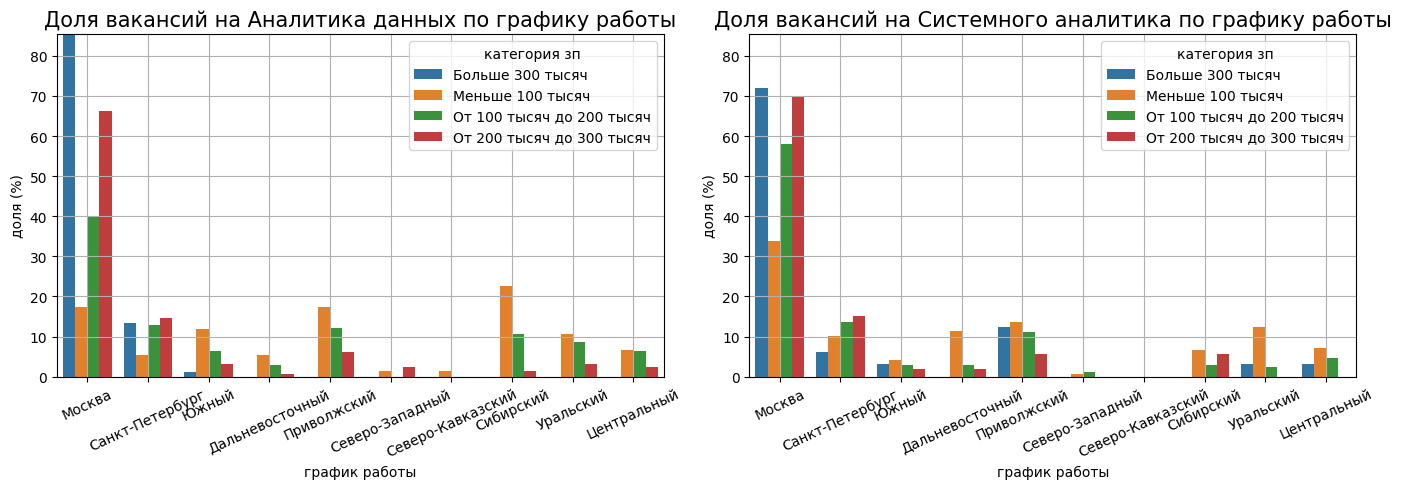

In [ ]:
# параметры для графиков
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharex=True)  # Создаем 1 строку и 2 столбца

# Аналитик данных
experience_count_data_analyst = data.query('vacancies=="Аналитик данных" and salary_bin_corr != "ЗП не указана"').groupby(['salary_bin_corr', 'district']).size().reset_index(name='count')
experience_count_data_analyst['percentage'] = experience_count_data_analyst.groupby('salary_bin_corr')['count'].transform(lambda x: x / x.sum() * 100)

sns.barplot(data=experience_count_data_analyst, x='district', y='percentage', hue='salary_bin_corr', ax=axes[0])
axes[0].set_title('Доля вакансий на Аналитика данных по графику работы', fontsize=15)
axes[0].set_xlabel('график работы')
axes[0].set_ylabel('доля (%)')
axes[0].legend(title='категория зп')
axes[0].tick_params(axis='x', rotation=25)
axes[0].grid(True)

# Системный аналитик
experience_count = data.query('vacancies=="Системный аналитик" and salary_bin_corr != "ЗП не указана"').groupby(['salary_bin_corr', 'district']).size().reset_index(name='count')
experience_count['percentage'] = experience_count.groupby('salary_bin_corr')['count'].transform(lambda x: x / x.sum() * 100)

sns.barplot(data=experience_count, x='district', y='percentage', hue='salary_bin_corr', ax=axes[1])
axes[1].set_title('Доля вакансий на Системного аналитика по графику работы', fontsize=15)
axes[1].set_xlabel('график работы')
axes[1].set_ylabel('доля (%)')
axes[1].legend(title='категория зп')
axes[1].tick_params(axis='x', rotation=25)
axes[1].grid(True)

# Установка одинаковых границ для оси Y
y_max = max(experience_count_data_analyst['percentage'].max(), experience_count['percentage'].max())
axes[0].set_ylim(0, y_max)
axes[1].set_ylim(0, y_max)

plt.tight_layout()
plt.show()

**V** Видим, что существует зависимость размера зп от региона, а точнее от городов фед.значения. В Москве и СПб зарплата предлагается гораздо более выше, чем в др.регионах. Выше 300 тыс в регионах почти не предлагается. Чаще всего в регионах представлены вакансии ниже 100 тыс.

### 3.6. Навыки

In [ ]:
#сохраним топ-30 навыков в отдельную переменную
skills = key_skills_table.value_counts().head(30)

In [ ]:
#функция для поиска топ-30 навыков в датафрейме и подсчета их количества в разрезе грейдов
def count_skills(data, skills):
    # Создаем список для хранения результатов
    results = []

    # Проходим по всем уникальным значение из skills
    for skill in skills.index:
        # Применяем фильтр для каждому значению skill
        filtered = data[data['key_skills'].apply(lambda x: skill in x)]

        # Если есть результаты, добавляем в результат с нужной информацией
        if not filtered.empty:
            counts = filtered.groupby('experience').size()
            for experience, count in counts.items():
                results.append({'experience': experience, 'skill': skill, 'count': count})

    # Преобразуем результаты в DataFrame
    return pd.DataFrame(results)

In [ ]:
#сохраним отдельно данные о Аналитиках данных и Системных аналитиках
data_da = data.query('vacancies=="Аналитик данных"')
data_sa = data.query('vacancies=="Системный аналитик"')

In [ ]:
#запускаем функцию для Аналитиков данных
count_skills_da = count_skills(data_da, skills)

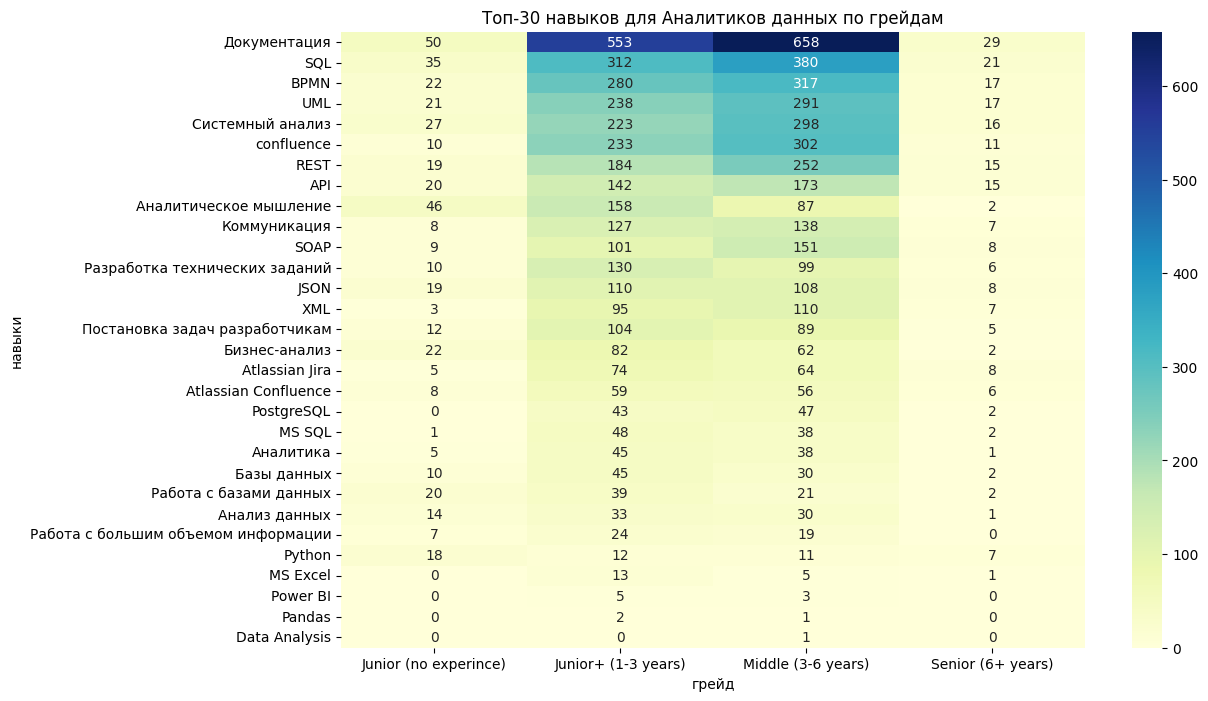

In [ ]:
# Создаем сводную таблицу
pivot_table = count_skills_da.pivot_table(values='count', index='skill', columns='experience', fill_value=0)

# Сортируем по сумме значений в строках
pivot_table = pivot_table.loc[pivot_table.sum(axis=1).sort_values(ascending=False).index]

# Создаем тепловую карту
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='g')
plt.title('Топ-30 навыков для Аналитиков данных по грейдам')
plt.xlabel('грейд')
plt.ylabel('навыки')
plt.show()

In [ ]:
count_skills_sa = count_skills(data_sa, skills)

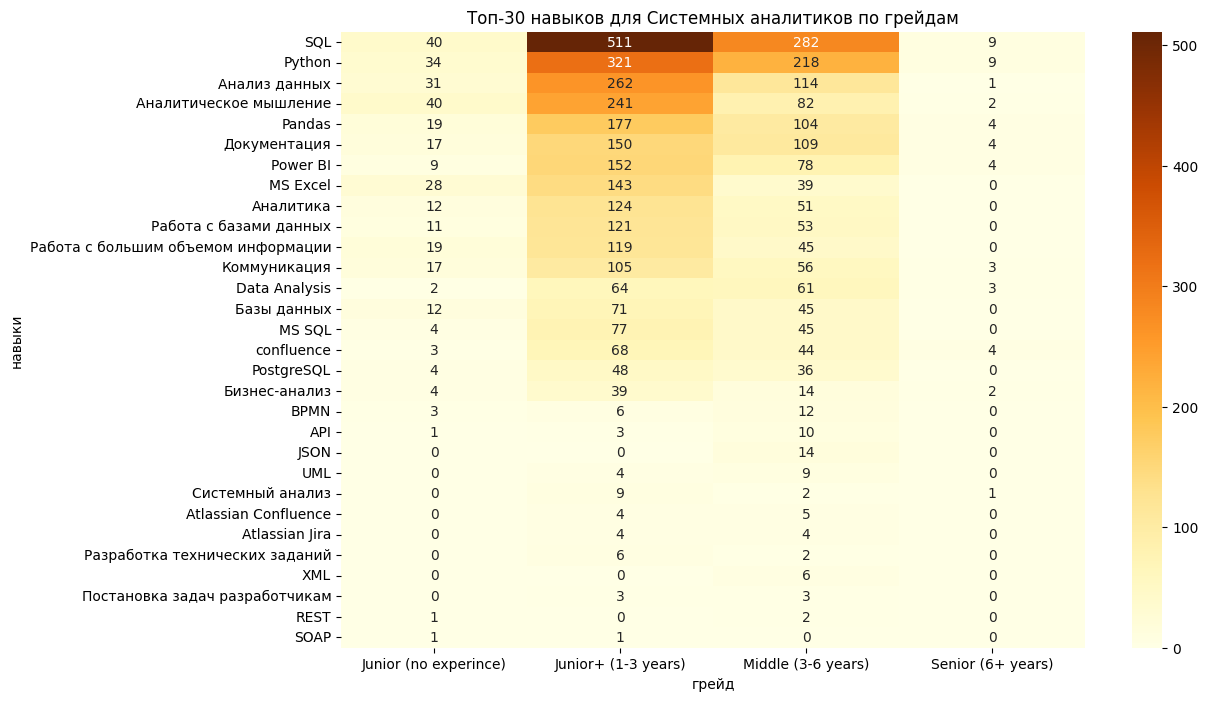

In [ ]:
# Создаем сводную таблицу
pivot_table = count_skills_sa.pivot_table(values='count', index='skill', columns='experience', fill_value=0)

# Сортируем по сумме значений в строках
pivot_table = pivot_table.loc[pivot_table.sum(axis=1).sort_values(ascending=False).index]

# Создаем тепловую карту
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlOrBr', annot=True, fmt='g')
plt.title('Топ-30 навыков для Системных аналитиков по грейдам')
plt.xlabel('грейд')
plt.ylabel('навыки')
plt.show()

**V** Видим однозначно, что hard навыки преобладают по обоим видам вакансий и по всем грейдам. Из 30 навыков к soft навыкам можно отнести только 2.  
Топ-5 требуемых навыков для Анатитиков данных: SQL, Python, Анализ данных, Аналитическое мышление, Pandas  
Топ-5 требудемых навыков для Системных аналитиков: Документация, SQL, BPMN, UML, Системный анализ

### 3.7. ТОП работодателей

Выделим 10 работодателей с наибольшим количеством вакансий и посмотрим что они предлагают

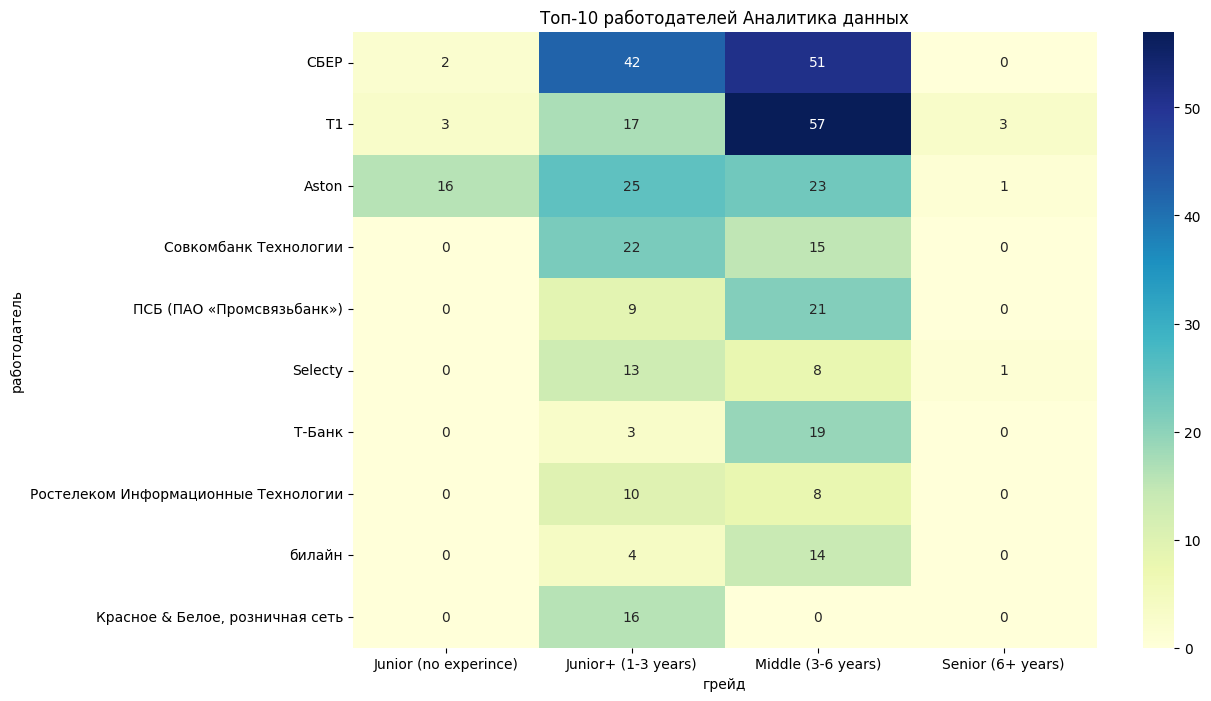

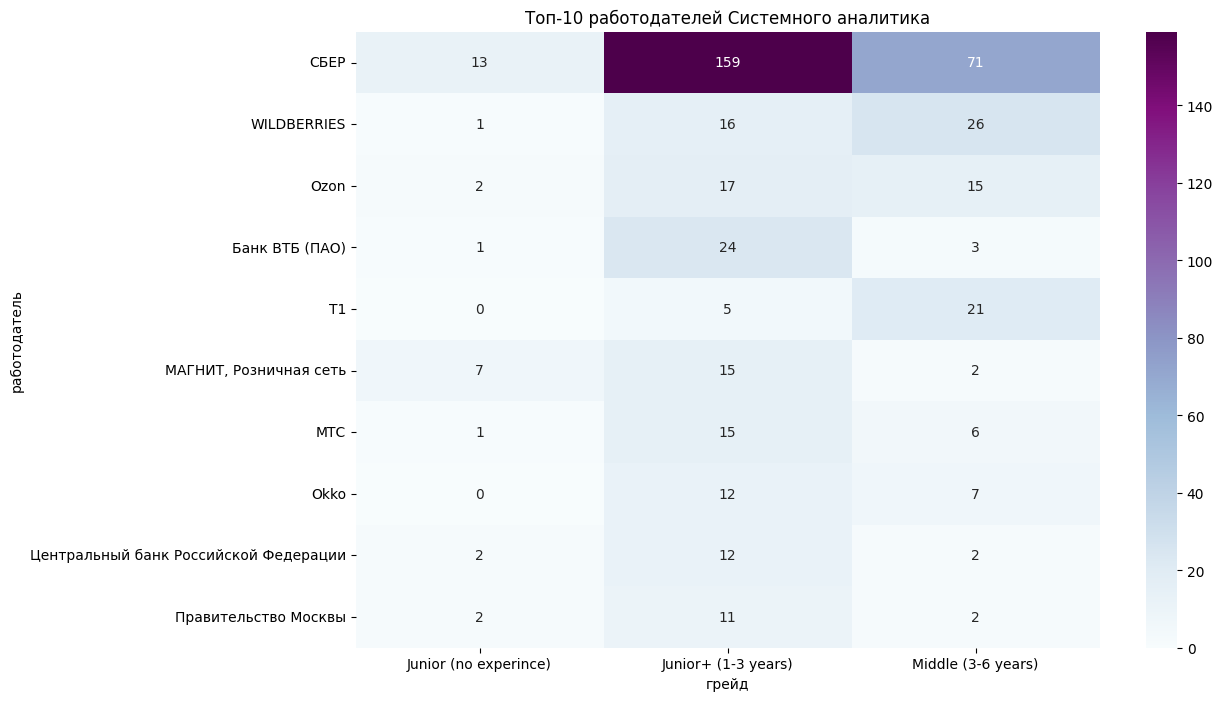

In [ ]:
# Получаем топ-10 работодателей Аналитиков данных
top_employer_da = data_da['employer'].value_counts().head(10)
top_employer_list = top_employer_da.index.tolist()

# Фильтрация данных
filtered_data = data_da[data_da['employer'].isin(top_employer_list)]

# Создание сводной таблицы для Аналитиков данных
pivot_table = pd.pivot_table(filtered_data,
                             index='employer',
                             columns='experience',
                             values='id',  # Или другой столбец с вакансиями
                             aggfunc='count',
                             fill_value=0)

# Добавление столбца с суммами для сортировки
pivot_table['Total'] = pivot_table.sum(axis=1)

# Сортировка сводной таблицы по общему количеству вакансий
sorted_pivot_table = pivot_table.sort_values(by='Total', ascending=False).drop(columns='Total')

# Создание тепловой карты
plt.figure(figsize=(12, 8))
sns.heatmap(sorted_pivot_table, cmap='YlGnBu', annot=True, fmt='g')
plt.title('Топ-10 работодателей Аналитика данных')
plt.xlabel('грейд')
plt.ylabel('работодатель')
plt.show()


# Получаем топ-10 работодателей Системных аналитиков
top_employer_sa = data_sa['employer'].value_counts().head(10)
top_employer_list = top_employer_sa.index.tolist()

# Фильтрация данных
filtered_data = data_sa[data_sa['employer'].isin(top_employer_list)]

# Создание сводной таблицы для Аналитиков данных
pivot_table = pd.pivot_table(filtered_data,
                             index='employer',
                             columns='experience',
                             values='id',  # Или другой столбец с вакансиями
                             aggfunc='count',
                             fill_value=0)

# Добавление столбца с суммами для сортировки
pivot_table['Total'] = pivot_table.sum(axis=1)

# Сортировка сводной таблицы по общему количеству вакансий
sorted_pivot_table = pivot_table.sort_values(by='Total', ascending=False).drop(columns='Total')

# Создание тепловой карты
plt.figure(figsize=(12, 8))
sns.heatmap(sorted_pivot_table, cmap='BuPu', annot=True, fmt='g')
plt.title('Топ-10 работодателей Системного аналитика')
plt.xlabel('грейд')
plt.ylabel('работодатель')
plt.show()

**V** Топ-работодателей Системных аналитиков и Аналитиков данных отличаются. Только СБЕР и Т1 являются в топе обоих видов вакансий. При этом работодатели из нескольких сфер деятельности: банки, IT, маркетплейсы и связь.  

Топ-10 работодателей для Системного аналитика

СБЕР                                   
Т1                                      
Aston                                   
Совкомбанк Технологии                   
ПСБ (ПАО «Промсвязьбанк»)              
Т-Банк                                  
Selecty                                 
Ростелеком Информационные Технологии    
билайн                                  
Прикладные технологии  

Топ-10 работодателей для Аналитика данных

СБЕР                                     
WILDBERRIES                               
Ozon                                      
Банк ВТБ (ПАО)                            
Т1                                        
МАГНИТ, Розничная сеть                   
МТС                                       
Okko                                      
Центральный банк Российской Федерации     
Яндекс                         

### 3.8. Промежуточный вывод

**Грейд**
Вакансии на Аналитика данных требуют опыта работы Junior+ (1-3 years) в 45% случаев, и в 50% - Middle (3-6 years).
На Системного аналитика требуют опыта работы Junior+ (1-3 years) в 60% случаев и 30% Middle (3-6 years).
Без опыта работы и Senior (6+ years) требуется значительно меньше (менее 10% каждой категории) по обоим вакансиям.

**Тип занятости**
На обе профессии по всем грейдам в подавляющем большинстве требуются на полную занятость. При этом другой тип занятости чаще предлагается для Junior (no experince) и чаще у Системных аналитиков.

**График работы**
По обоим видам вакансий и всем грейдам чаще предлагают полный день. При этом Системным аналитикам удаленная работа предлагается чаще, чем Аналитикам данных- по всем грейдам у 30-40% вакансий. Аналитикам данных в начале пути менее 10% вакансий возможна удаленная работа.

**Размер зп**
Довольно логично распределены категории зп по грейдам по обоим видам вакансий. Чем меньше опыт, тем меньше зп. Отличие заключается в том, что 100% вакансий на Аналитика данных предлагает Senior категорию от 200 до 300 тыс, когда у Системных аналитиков, 60% вакансий предлагает выше 300 тыс.

**Регион**
70% вакансий на Аналитика данных и 60% на Системного аналитика приходится на Москву. По 5-10% приходится на СПб и Приволжский округ, остальные округа предлагают по 5% и менее.
Видим, что вакансии на Аналитика данных преобладают в Москве, 100% вакансий Senior и 80% Middle в Москве.
Вакансии на Системного аналитика чуть более распределены по стране, особенно Junior без опыта.
Видим, что существует зависимость размера зп от региона, а точнее от городов фед.значения. В Москве и СПб зарплата предлагается гораздо более выше, чем в др.регионах. Выше 300 тыс в регионах почти не предлагается. Чаще всего в регионах представлены вакансии ниже 100 тыс.

**Навыки**
Видим однозначно, что hard навыки преобладают по обоим видам вакансий и по всем грейдам. Из 30 навыков к soft навыкам можно отнести только 2: Коммуникация и Постановка задач разработчикам
Топ-5 требуемых навыков для Анатитиков данных: SQL, Python, Анализ данных, Аналитическое мышление, Pandas
Топ-5 требудемых навыков для Системных аналитиков: Документация, SQL, BPMN, UML, Системный анализ
  
**Топ-10 работодателей**
Топ-работодателей Системных аналитиков и Аналитиков данных отличаются. Только СБЕР и Т1 являются в топе обоих видов вакансий. При этом работодатели из нескольких сфер деятельности: банки, IT, маркетплейсы и связь.

Топ-10 работодателей для Системного аналитика: СБЕР, Т1, Aston, Совкомбанк Технологии, ПСБ (ПАО «Промсвязьбанк»), Т-Банк, Selecty, Ростелеком Информационные Технологии, билайн, Прикладные технологии

Топ-10 работодателей для Аналитика данных: СБЕР, WILDBERRIES, Ozon, Банк ВТБ (ПАО), Т1, МАГНИТ, МТС, Okko ЦБ РФ, Яндекс

## 4. ВЫВОД и РЕКОМЕНДАЦИИ

**Краткий обзор проведённой работы:**

В нашем распоряжении были 1801 строк данных о вакансиях на аналитика данных за период с 13.02.24 по 11.06.24 и 1915 строк - на системных аналитиков - за период 13.02.24 по 11.06.24. Этих данных достаточно для анализа. Добавлена таблица с сопоставлением городов с фед.округами России.

Проведена предобработка:
1. объединены таблицы в один датафрейм
2. проверено на пропуски. Отсутствует более 80% данных о нижней и верхней границе зп, почти 80% об отделе работодателя и "твердых" навыках, около 50% "мягких" навыков и почти 40% ключей к навыкам.
3. проверено на дубли - не были обнаружены
4. проверены категориальные данные - они корректные. Объединили малочисленные типа занятости (Стажировка, Частичная занятость и Проектная работа) в Другую занятость
5. проверены количественные данные - избавились от выбросов
6. добавлены новые столбцы:
 - salary_bin_corr - корректные категории зп
 - employment_new - тип занятости
 - vacancies - тип вакансий (Аналитик данных или Системный аналитик)
 - district - федеральные округа

**Главные выводы**

**Грейд**
Вакансии на Аналитика данных требуют опыта работы Junior+ (1-3 years) в 60% случаев, и в 30% - Middle (3-6 years).
На Системного аналитика требуют опыта работы Junior+ (1-3 years) в 45% случаев и 50% Middle (3-6 years).
Без опыта работы и Senior (6+ years) требуется значительно меньше (менее 10% каждой категории) по обоим вакансиям.

**Тип занятости**
На обе профессии по всем грейдам в подавляющем большинстве требуются на полную занятость. При этом другой тип занятости чаще предлагается для Junior (no experince) и чаще у Системных аналитиков.

**График работы**
По обоим видам вакансий и всем грейдам чаще предлагают полный день. При этом Системным аналитикам удаленная работа предлагается чаще, чем Аналитикам данных- по всем грейдам у 30-40% вакансий. Аналитикам данных в начале пути менее 10% вакансий возможна удаленная работа.

**Размер зп**
Довольно логично распределены категории зп по грейдам по обоим видам вакансий. Чем меньше опыт, тем меньше зп. Отличие заключается в том, что 100% вакансий на Аналитика данных предлагает Senior категорию от 200 до 300 тыс, когда у Системных аналитиков, 60% вакансий предлагает выше 300 тыс.

**Регион**
70% вакансий на Аналитика данных и 60% на Системного аналитика приходится на Москву. По 5-10% приходится на СПб и Приволжский округ, остальные округа предлагают по 5% и менее.
Видим, что вакансии на Аналитика данных преобладают в Москве, 100% вакансий Senior и 80% Middle в Москве.
Вакансии на Системного аналитика чуть более распределены по стране, особенно Junior без опыта.
Видим, что существует зависимость размера зп от региона, а точнее от городов фед.значения. В Москве и СПб зарплата предлагается гораздо более выше, чем в др.регионах. Выше 300 тыс в регионах почти не предлагается. Чаще всего в регионах представлены вакансии ниже 100 тыс.

**Навыки**
Видим однозначно, что hard навыки преобладают по обоим видам вакансий и по всем грейдам. Из 30 навыков к soft навыкам можно отнести только 2: Коммуникация и Постановка задач разработчикам
Топ-5 требуемых навыков для Анатитиков данных: SQL, Python, Анализ данных, Аналитическое мышление, Pandas
Топ-5 требудемых навыков для Системных аналитиков: Документация, SQL, BPMN, UML, Системный анализ
  
**Топ-10 работодателей**
Топ-работодателей Системных аналитиков и Аналитиков данных отличаются. Только СБЕР и Т1 являются в топе обоих видов вакансий. При этом работодатели из нескольких сфер деятельности: банки, IT, маркетплейсы и связь.

Топ-10 работодателей для Системного аналитика: СБЕР, Т1, Aston, Совкомбанк Технологии, ПСБ (ПАО «Промсвязьбанк»), Т-Банк, Selecty, Ростелеком Информационные Технологии, билайн, Прикладные технологии

Топ-10 работодателей для Аналитика данных: СБЕР, WILDBERRIES, Ozon, Банк ВТБ (ПАО), Т1, МАГНИТ, МТС, Okko ЦБ РФ, Яндекс

**Рекомендации (для обоих профессий)**

1. Обратить внимание на свой грейд. При отсутствии опыта, стоит готовым к конкуренции, т.к вакансий на рынке для Junior (no experince) предложено в малом количестве.
2. Развивайте востребованные навыки. Углубите свои знания в SQL, Python, аналитическом мышлении для повышения конкурентоспособности на рынке вакансий.
3. Ищите рабочие места в Москве. Если возможно, сфокусируйтесь на поиске позиций в крупных городах, чтобы увеличить шансы на получение высокооплачиваемых предложений.
4. Рассмотрите работу в новых сферах. Не ограничивайтесь только банковским сектором – исследуйте IT, маркетплейсы и связи, где также много предложений.
5. Подготовьте резюме с акцентом на hard skills: Убедитесь, что Ваш опыт и достижения четко отражают технические навыки, которые являются приоритетными для работодателей.
